First data set: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE81076
Second data set: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE85241

How are we going to define our batches? 

-For the first data set, we can define batches by the organ donors --> donors 2, 3, 7, 10, 17 (5 different batches)
-For the second data set, we can define batches by the organ donors --> donors 28, 29, 30, and 31

-The cells studied for the organ donors in the second data set are consistent (8 libraries of cells for each donor), whereas the cells studied for the organ donors in the first data set are inconsistent (different cell types, different number of libraries of cells studied).

Loading the necessary packages 

In [1]:
import pandas as pd
import sklearn # scikit learn package will be very helpful
import numpy as np

from sklearn.decomposition import PCA  # for PCA
import matplotlib.pyplot as plt  # for plotting variance thresholds to pick the number of principal components to do the PCA with
%matplotlib inline

from sklearn.neighbors import NearestNeighbors  # for finding nearest neighbors between two data sets

Reading in the data sets 

In [2]:
# reading in the first pancreas data set

pancreas_data = pd.read_table("GSE81076_D2_3_7_10_17.txt")  
pancreas_data

,Unnamed: 0,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
0,A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,A1CF__chr10,0.000000,2.007853,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.001958,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.000000,0.0
3,A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20143,ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
20144,ZYG11B__chr1,0.000000,1.001958,0.000000,5.049473,1.001958,1.001958,1.001958,1.001958,0.000000,...,1.001958,1.001958,2.007853,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.0
20145,ZYX__chr7,1.001958,0.000000,3.017717,2.007853,0.000000,4.031579,0.000000,1.001958,2.007853,...,7.097484,4.031579,0.000000,1.001958,1.001958,0.000000,0.000000,0.000000,1.001958,0.0
20146,ZZEF1__chr17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001958,0.000000,...,0.000000,0.000000,1.001958,0.000000,0.000000,1.001958,0.000000,0.000000,0.000000,0.0


In [3]:
# reading in the second pancreas data set - gene names are already the row names here

pancreas_data_2 = pd.read_table("GSE85241_cellsystems_dataset_4donors_updated.csv")  
pancreas_data_2

,D28-1_1,D28-1_2,D28-1_3,D28-1_4,D28-1_5,D28-1_6,D28-1_7,D28-1_8,D28-1_9,D28-1_10,...,D30-8_87,D30-8_88,D30-8_89,D30-8_90,D30-8_91,D30-8_92,D30-8_93,D30-8_94,D30-8_95,D30-8_96
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
A1BG__chr19,0.000000,0.000000,1.001958,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.0,0.0
A1CF__chr10,6.071431,0.000000,2.007853,6.071431,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.001958,7.097484,3.017717,0.000000,3.017717,0.000000,0.000000,0.0,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,2.007853,0.000000,1.001958,0.000000,0.000000,0.000000,0.0,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ZYG11B__chr1,2.007853,6.071431,1.001958,6.071431,3.017717,0.0,0.0,0.0,0.0,0.0,...,9.162012,2.007853,2.007853,1.001958,4.031579,2.007853,3.017717,9.162012,0.0,0.0
ZYX__chr7,0.000000,5.049473,0.000000,1.001958,0.000000,0.0,0.0,0.0,0.0,0.0,...,3.017717,0.000000,0.000000,0.000000,0.000000,1.001958,8.127667,5.049473,0.0,0.0
ZZEF1__chr17,0.000000,4.031579,1.001958,3.017717,0.000000,0.0,0.0,0.0,0.0,0.0,...,2.007853,0.000000,1.001958,0.000000,4.031579,0.000000,2.007853,3.017717,0.0,0.0


Modifying the data sets to the needed formats

In [4]:
# setting the gene names as the row names

pancreas_data = pancreas_data.rename(columns = {"Unnamed: 0":"Genes"}) 
pancreas_data.set_index(["Genes"], inplace = True)
pancreas_data

,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,D2ex_10,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A1CF__chr10,0.000000,2.007853,1.001958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.001958,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.000000,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.007853,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
ZYG11B__chr1,0.000000,1.001958,0.000000,5.049473,1.001958,1.001958,1.001958,1.001958,0.000000,0.0,...,1.001958,1.001958,2.007853,0.000000,0.000000,1.001958,1.001958,1.001958,1.001958,0.0
ZYX__chr7,1.001958,0.000000,3.017717,2.007853,0.000000,4.031579,0.000000,1.001958,2.007853,0.0,...,7.097484,4.031579,0.000000,1.001958,1.001958,0.000000,0.000000,0.000000,1.001958,0.0


Cosine normalization

In [5]:
# for cosine normalization

from sklearn.preprocessing import Normalizer



In [6]:
# cosine normalization of first pancreas data set - gets rid of row names and column names though...

transformer = Normalizer().fit(pancreas_data)
pancreas_data_cnorm = pd.DataFrame(transformer.transform(pancreas_data))
pancreas_data_cnorm

,0,1,2,3,4,5,6,7,8,9,...,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.033422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.066485,0.033177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.033177,0.000000,0.000000,0.033177,0.033177,0.033177,0.033177,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121129,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
20144,0.000000,0.007053,0.000000,0.035542,0.007053,0.007053,0.007053,0.007053,0.000000,0.0,...,0.007053,0.007053,0.014133,0.000000,0.000000,0.007053,0.007053,0.007053,0.007053,0.0
20145,0.013294,0.000000,0.040040,0.026641,0.000000,0.053492,0.000000,0.013294,0.026641,0.0,...,0.094171,0.053492,0.000000,0.013294,0.013294,0.000000,0.000000,0.000000,0.013294,0.0
20146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042107,0.000000,0.0,...,0.000000,0.000000,0.042107,0.000000,0.000000,0.042107,0.000000,0.000000,0.000000,0.0


In [7]:
# function adapted from HW1 - cosine normalization 

def normalizing_cells_MaxAbsScaler(data):
    
    """
        input data: data frame with gene expression data  
            columns are the cells and rows are genes
        output data_normalized_data_values: normalized (scaled) data
        function:  dividing the value of each gene for each cell 
                by the maximum value of that cell.
    """
    import sklearn.preprocessing
    
    # creating the list of patients
    cells = data.columns.values
    
    #using Sklearn to scale the data 
    scaler = sklearn.preprocessing.MaxAbsScaler()
    data_scaled = scaler.fit_transform(data)
    
    #creating the dataframe, the output of sklearn MaxAbsScaler is an array
    data_normalized_data_values = pd.DataFrame(data_scaled, columns= cells, index = data.index)
      
    return data_normalized_data_values

In [8]:
# cosine normalization here keeps the gene and cell names in the rows and columns
# cosine normalization for the first pancreas data set

normalized_pancreas = normalizing_cells_MaxAbsScaler(pancreas_data)
normalized_pancreas

,D2ex_1,D2ex_2,D2ex_3,D2ex_4,D2ex_5,D2ex_6,D2ex_7,D2ex_8,D2ex_9,D2ex_10,...,D17TGFB_87,D17TGFB_88,D17TGFB_89,D17TGFB_90,D17TGFB_91,D17TGFB_92,D17TGFB_93,D17TGFB_94,D17TGFB_95,D17TGFB_96
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A1BG__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.005776,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A1CF__chr10,0.000000,0.001993,0.000941,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.005776,0.000000,0.000000,0.00088,0.00088,0.000627,0.001313,0.000000,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.002632,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
ZYG11B__chr1,0.000000,0.000994,0.000000,0.038319,0.012049,0.007604,0.008911,0.01077,0.00000,0.0,...,0.005340,0.005776,0.001257,0.000000,0.00000,0.00088,0.000627,0.001313,0.000941,0.0
ZYX__chr7,0.003588,0.000000,0.002834,0.015237,0.000000,0.030595,0.000000,0.01077,0.01070,0.0,...,0.037824,0.023240,0.000000,0.001595,0.00088,0.00000,0.000000,0.000000,0.000941,0.0


In [9]:
# cosine normalization here keeps the gene and cell names in the rows and columns
# cosine normalization for the second pancreas data set

normalized_pancreas_2 = normalizing_cells_MaxAbsScaler(pancreas_data_2)
normalized_pancreas_2

,D28-1_1,D28-1_2,D28-1_3,D28-1_4,D28-1_5,D28-1_6,D28-1_7,D28-1_8,D28-1_9,D28-1_10,...,D30-8_87,D30-8_88,D30-8_89,D30-8_90,D30-8_91,D30-8_92,D30-8_93,D30-8_94,D30-8_95,D30-8_96
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
A1BG__chr19,0.000000,0.000000,0.000627,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002492,0.0,0.0
A1CF__chr10,0.003802,0.000000,0.001257,0.006319,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000627,0.004444,0.002429,0.000000,0.001890,0.000000,0.000000,0.0,0.0
A2M-AS1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.001257,0.000000,0.001505,0.000000,0.000000,0.000000,0.0,0.0
A2ML1__chr12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ZYG11B__chr1,0.001257,0.007314,0.000627,0.006319,0.011157,0.0,0.0,0.0,0.0,0.0,...,0.016433,0.001257,0.001257,0.000807,0.006055,0.001257,0.005413,0.011371,0.0,0.0
ZYX__chr7,0.000000,0.006083,0.000000,0.001043,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.005413,0.000000,0.000000,0.000000,0.000000,0.000627,0.014578,0.006267,0.0,0.0
ZZEF1__chr17,0.000000,0.004857,0.000627,0.003141,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.003601,0.000000,0.000627,0.000000,0.006055,0.000000,0.003601,0.003745,0.0,0.0


Adding a batch variable to the data sets 

In [10]:
# adding a batch variable to the first transposed data set

normalized_pancreas_t= normalized_pancreas.transpose()
x = np.array(["1"])
normalized_pancreas_t['batch'] = np.repeat(x, [1728])
normalized_pancreas_t

Genes,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2MP1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D2ex_1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.003588,0.00000,0.0,1
D2ex_2,0.0,0.0,0.001993,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000994,0.0,0.000994,0.000000,0.00000,0.0,1
D2ex_3,0.0,0.0,0.000941,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000941,0.0,0.000000,0.002834,0.00000,0.0,1
D2ex_4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.007604,0.007604,0.0,0.038319,0.015237,0.00000,0.0,1
D2ex_5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.012049,0.0,0.012049,0.000000,0.00000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D17TGFB_92,0.0,0.0,0.000880,0.0,0.000000,0.0,0.0,0.0,0.0,0.000880,...,0.0,0.0,0.000000,0.000880,0.0,0.000880,0.000000,0.00088,0.0,1
D17TGFB_93,0.0,0.0,0.000627,0.0,0.000000,0.0,0.0,0.0,0.0,0.000627,...,0.0,0.0,0.000000,0.000627,0.0,0.000627,0.000000,0.00000,0.0,1
D17TGFB_94,0.0,0.0,0.001313,0.0,0.002632,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.001313,0.0,0.001313,0.000000,0.00000,0.0,1
D17TGFB_95,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000941,...,0.0,0.0,0.000000,0.000941,0.0,0.000941,0.000941,0.00000,0.0,1


In [11]:
# adding a batch variable to the second transposed data set

normalized_pancreas_2_t= normalized_pancreas_2.transpose()
y = np.array(["2"])
normalized_pancreas_2_t['batch'] = np.repeat(y, [3072])
normalized_pancreas_2_t

,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,AACSP1__chr5,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D28-1_1,0.0,0.000000,0.003802,0.0,0.0,0.000000,0.000000,0.0,0.000627,0.0,...,0.0,0.000000,0.000627,0.003162,0.000000,0.001257,0.000000,0.000000,0.000000,2
D28-1_2,0.0,0.000000,0.000000,0.0,0.0,0.006083,0.001207,0.0,0.000000,0.0,...,0.0,0.000000,0.001207,0.011037,0.000000,0.007314,0.006083,0.004857,0.001207,2
D28-1_3,0.0,0.000627,0.001257,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,2
D28-1_4,0.0,0.001043,0.006319,0.0,0.0,0.000000,0.000000,0.0,0.001043,0.0,...,0.0,0.000000,0.002090,0.010616,0.001043,0.006319,0.001043,0.003141,0.002090,2
D28-1_5,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.011157,0.000000,0.011157,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D30-8_92,0.0,0.000000,0.001890,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000627,0.000627,0.004444,0.000000,0.001257,0.000627,0.000000,0.000627,2
D30-8_93,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.001797,0.0,...,0.0,0.000000,0.000000,0.001797,0.000000,0.005413,0.014578,0.003601,0.000000,2
D30-8_94,0.0,0.002492,0.000000,0.0,0.0,0.008809,0.001244,0.0,0.001244,0.0,...,0.0,0.000000,0.002492,0.010088,0.000000,0.011371,0.006267,0.003745,0.000000,2
D30-8_95,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2


Dropping any missing values from the transposed data sets 

In [12]:
# dropping missing values - looks like there aren't any here

normalized_pancreas_t.dropna(axis=1) 
normalized_pancreas_t

Genes,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2MP1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D2ex_1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.003588,0.00000,0.0,1
D2ex_2,0.0,0.0,0.001993,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000994,0.0,0.000994,0.000000,0.00000,0.0,1
D2ex_3,0.0,0.0,0.000941,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000941,0.0,0.000000,0.002834,0.00000,0.0,1
D2ex_4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.007604,0.007604,0.0,0.038319,0.015237,0.00000,0.0,1
D2ex_5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.012049,0.0,0.012049,0.000000,0.00000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D17TGFB_92,0.0,0.0,0.000880,0.0,0.000000,0.0,0.0,0.0,0.0,0.000880,...,0.0,0.0,0.000000,0.000880,0.0,0.000880,0.000000,0.00088,0.0,1
D17TGFB_93,0.0,0.0,0.000627,0.0,0.000000,0.0,0.0,0.0,0.0,0.000627,...,0.0,0.0,0.000000,0.000627,0.0,0.000627,0.000000,0.00000,0.0,1
D17TGFB_94,0.0,0.0,0.001313,0.0,0.002632,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.001313,0.0,0.001313,0.000000,0.00000,0.0,1
D17TGFB_95,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000941,...,0.0,0.0,0.000000,0.000941,0.0,0.000941,0.000941,0.00000,0.0,1


In [13]:
# verifying that there are no missing values

normalized_pancreas_t.isnull().values.any()

False

In [14]:
# dropping missing values - looks like there aren't any here

normalized_pancreas_2_t.dropna(axis=1) 
normalized_pancreas_2_t

,A1BG-AS1__chr19,A1BG__chr19,A1CF__chr10,A2M-AS1__chr12,A2ML1__chr12,A2M__chr12,A4GALT__chr22,A4GNT__chr3,AAAS__chr12,AACSP1__chr5,...,ZWINT__chr10,ZXDA__chrX,ZXDB__chrX,ZXDC__chr3,ZYG11A__chr1,ZYG11B__chr1,ZYX__chr7,ZZEF1__chr17,ZZZ3__chr1,batch
D28-1_1,0.0,0.000000,0.003802,0.0,0.0,0.000000,0.000000,0.0,0.000627,0.0,...,0.0,0.000000,0.000627,0.003162,0.000000,0.001257,0.000000,0.000000,0.000000,2
D28-1_2,0.0,0.000000,0.000000,0.0,0.0,0.006083,0.001207,0.0,0.000000,0.0,...,0.0,0.000000,0.001207,0.011037,0.000000,0.007314,0.006083,0.004857,0.001207,2
D28-1_3,0.0,0.000627,0.001257,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,0.000627,0.000000,2
D28-1_4,0.0,0.001043,0.006319,0.0,0.0,0.000000,0.000000,0.0,0.001043,0.0,...,0.0,0.000000,0.002090,0.010616,0.001043,0.006319,0.001043,0.003141,0.002090,2
D28-1_5,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.011157,0.000000,0.011157,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D30-8_92,0.0,0.000000,0.001890,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000627,0.000627,0.004444,0.000000,0.001257,0.000627,0.000000,0.000627,2
D30-8_93,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.001797,0.0,...,0.0,0.000000,0.000000,0.001797,0.000000,0.005413,0.014578,0.003601,0.000000,2
D30-8_94,0.0,0.002492,0.000000,0.0,0.0,0.008809,0.001244,0.0,0.001244,0.0,...,0.0,0.000000,0.002492,0.010088,0.000000,0.011371,0.006267,0.003745,0.000000,2
D30-8_95,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2


In [15]:
# verifying that there are no missing values

normalized_pancreas_2_t.isnull().values.any()

False

Merging the two data sets since the PCA is performed on the merged data set with all the batches

In [16]:
# finding the common genes (aka. features) that were measured in the two data sets

common_cols = list(set.intersection(set(normalized_pancreas_t.columns), set(normalized_pancreas_2_t.columns)))
common_cols = [col for col in set(normalized_pancreas_t.columns).intersection(normalized_pancreas_2_t.columns)]

In [17]:
# adjusting the two original data sets to only have the common genes or features

normalized_pancreas_t_adj = normalized_pancreas_t[common_cols]
normalized_pancreas_2_t_adj = normalized_pancreas_2_t[common_cols]

In [18]:
normalized_pancreas_t_adj

Genes,AJUBA__chr14,CDK15__chr2,RPN2__chr20,MSMO1__chr4,CEBPA-AS1__chr19,RPL13AP3__chr14,TUBA1A__chr12,PRPF31__chr19,VAV2__chr9,DUOX2__chr15,...,CLEC6A__chr12,RABGGTA__chr14,ARAP2__chr4,HMG20A__chr15,SNORA58__chr3,ATL1__chr14,GPN1__chr2,ENC1__chr5,CHRD__chr3,GCM1__chr6
D2ex_1,0.000000,0.0,0.003588,0.000000,0.0,0.036528,0.000000,0.003588,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
D2ex_2,0.000000,0.0,0.001993,0.000000,0.0,0.004001,0.000000,0.000000,0.000000,0.017459,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
D2ex_3,0.000000,0.0,0.000000,0.000000,0.0,0.004743,0.000000,0.000941,0.000000,0.000000,...,0.0,0.000000,0.000941,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
D2ex_4,0.000000,0.0,0.022901,0.053861,0.0,0.038319,0.000000,0.000000,0.007604,0.000000,...,0.0,0.000000,0.000000,0.007604,0.0,0.0,0.015237,0.022901,0.0,0.0
D2ex_5,0.024146,0.0,0.012049,0.000000,0.0,0.036291,0.036291,0.000000,0.000000,0.085353,...,0.0,0.012049,0.000000,0.000000,0.0,0.0,0.000000,0.036291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D17TGFB_92,0.000000,0.0,0.002651,0.004436,0.0,0.001764,0.000000,0.000000,0.000000,0.040301,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000880,0.0,0.0
D17TGFB_93,0.000627,0.0,0.001890,0.001890,0.0,0.003162,0.000000,0.000000,0.001257,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000627,0.0,0.0
D17TGFB_94,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.005284,0.000000,0.001313,0.002632,...,0.0,0.000000,0.000000,0.001313,0.0,0.0,0.000000,0.000000,0.0,0.0
D17TGFB_95,0.000000,0.0,0.000941,0.000941,0.0,0.000000,0.006666,0.000941,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [19]:
normalized_pancreas_2_t_adj

,AJUBA__chr14,CDK15__chr2,RPN2__chr20,MSMO1__chr4,CEBPA-AS1__chr19,RPL13AP3__chr14,TUBA1A__chr12,PRPF31__chr19,VAV2__chr9,DUOX2__chr15,...,CLEC6A__chr12,RABGGTA__chr14,ARAP2__chr4,HMG20A__chr15,SNORA58__chr3,ATL1__chr14,GPN1__chr2,ENC1__chr5,CHRD__chr3,GCM1__chr6
D28-1_1,0.000000,0.0,0.000627,0.000627,0.0,0.000000,0.011015,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000627,0.000000,0.000000,0.0,0.0
D28-1_2,0.000000,0.0,0.011037,0.016072,0.0,0.000000,0.012288,0.000000,0.003635,0.001207,...,0.0,0.000000,0.000000,0.001207,0.0,0.000000,0.000000,0.006083,0.0,0.0
D28-1_3,0.000000,0.0,0.002524,0.000000,0.0,0.000000,0.002524,0.000627,0.000000,0.000000,...,0.0,0.000000,0.000627,0.000627,0.0,0.000000,0.000627,0.000000,0.0,0.0
D28-1_4,0.000000,0.0,0.007386,0.007386,0.0,0.000000,0.016087,0.000000,0.000000,0.000000,...,0.0,0.001043,0.000000,0.000000,0.0,0.002090,0.001043,0.000000,0.0,0.0
D28-1_5,0.007423,0.0,0.026241,0.000000,0.0,0.000000,0.003704,0.000000,0.000000,0.011157,...,0.0,0.000000,0.003704,0.007423,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D30-8_92,0.000000,0.0,0.005089,0.001257,0.0,0.001257,0.013040,0.000000,0.000000,0.000627,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000627,0.000000,0.0,0.0
D30-8_93,0.009057,0.0,0.020166,0.009057,0.0,0.000000,0.037351,0.003601,0.007231,0.049175,...,0.0,0.001797,0.005413,0.001797,0.0,0.000000,0.007231,0.025823,0.0,0.0
D30-8_94,0.001244,0.0,0.025846,0.011371,0.0,0.001244,0.048153,0.000000,0.001244,0.000000,...,0.0,0.000000,0.000000,0.001244,0.0,0.000000,0.003745,0.001244,0.0,0.0
D30-8_95,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [20]:
# merged data set

#normalized_pancreas_t_merged = normalized_pancreas_t_adj.append(normalized_pancreas_2_t_adj, ignore_index = True)

frames = [normalized_pancreas_t_adj, normalized_pancreas_2_t_adj]

normalized_pancreas_t_merged = pd.concat(frames, ignore_index = False)

In [21]:
# viewing the merged data set for PCA

normalized_pancreas_t_merged

Genes,AJUBA__chr14,CDK15__chr2,RPN2__chr20,MSMO1__chr4,CEBPA-AS1__chr19,RPL13AP3__chr14,TUBA1A__chr12,PRPF31__chr19,VAV2__chr9,DUOX2__chr15,...,CLEC6A__chr12,RABGGTA__chr14,ARAP2__chr4,HMG20A__chr15,SNORA58__chr3,ATL1__chr14,GPN1__chr2,ENC1__chr5,CHRD__chr3,GCM1__chr6
D2ex_1,0.000000,0.0,0.003588,0.000000,0.0,0.036528,0.000000,0.003588,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
D2ex_2,0.000000,0.0,0.001993,0.000000,0.0,0.004001,0.000000,0.000000,0.000000,0.017459,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
D2ex_3,0.000000,0.0,0.000000,0.000000,0.0,0.004743,0.000000,0.000941,0.000000,0.000000,...,0.0,0.000000,0.000941,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
D2ex_4,0.000000,0.0,0.022901,0.053861,0.0,0.038319,0.000000,0.000000,0.007604,0.000000,...,0.0,0.000000,0.000000,0.007604,0.0,0.0,0.015237,0.022901,0.0,0.0
D2ex_5,0.024146,0.0,0.012049,0.000000,0.0,0.036291,0.036291,0.000000,0.000000,0.085353,...,0.0,0.012049,0.000000,0.000000,0.0,0.0,0.000000,0.036291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D30-8_92,0.000000,0.0,0.005089,0.001257,0.0,0.001257,0.013040,0.000000,0.000000,0.000627,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000627,0.000000,0.0,0.0
D30-8_93,0.009057,0.0,0.020166,0.009057,0.0,0.000000,0.037351,0.003601,0.007231,0.049175,...,0.0,0.001797,0.005413,0.001797,0.0,0.0,0.007231,0.025823,0.0,0.0
D30-8_94,0.001244,0.0,0.025846,0.011371,0.0,0.001244,0.048153,0.000000,0.001244,0.000000,...,0.0,0.000000,0.000000,0.001244,0.0,0.0,0.003745,0.001244,0.0,0.0
D30-8_95,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [22]:
# storing the batch values for the different cells in a vector

batch_labels = normalized_pancreas_t_merged['batch']

batch_labels

D2ex_1      1
D2ex_2      1
D2ex_3      1
D2ex_4      1
D2ex_5      1
           ..
D30-8_92    2
D30-8_93    2
D30-8_94    2
D30-8_95    2
D30-8_96    2
Name: batch, Length: 4800, dtype: object

In [23]:
# dropping the batch column from the data set - produces final merged data set ready for PCA

normalized_pancreas_t_merged_final = normalized_pancreas_t_merged.drop(['batch'], axis = 1)
normalized_pancreas_t_merged_final

Genes,AJUBA__chr14,CDK15__chr2,RPN2__chr20,MSMO1__chr4,CEBPA-AS1__chr19,RPL13AP3__chr14,TUBA1A__chr12,PRPF31__chr19,VAV2__chr9,DUOX2__chr15,...,CLEC6A__chr12,RABGGTA__chr14,ARAP2__chr4,HMG20A__chr15,SNORA58__chr3,ATL1__chr14,GPN1__chr2,ENC1__chr5,CHRD__chr3,GCM1__chr6
D2ex_1,0.000000,0.0,0.003588,0.000000,0.0,0.036528,0.000000,0.003588,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
D2ex_2,0.000000,0.0,0.001993,0.000000,0.0,0.004001,0.000000,0.000000,0.000000,0.017459,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
D2ex_3,0.000000,0.0,0.000000,0.000000,0.0,0.004743,0.000000,0.000941,0.000000,0.000000,...,0.0,0.000000,0.000941,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
D2ex_4,0.000000,0.0,0.022901,0.053861,0.0,0.038319,0.000000,0.000000,0.007604,0.000000,...,0.0,0.000000,0.000000,0.007604,0.0,0.0,0.015237,0.022901,0.0,0.0
D2ex_5,0.024146,0.0,0.012049,0.000000,0.0,0.036291,0.036291,0.000000,0.000000,0.085353,...,0.0,0.012049,0.000000,0.000000,0.0,0.0,0.000000,0.036291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D30-8_92,0.000000,0.0,0.005089,0.001257,0.0,0.001257,0.013040,0.000000,0.000000,0.000627,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000627,0.000000,0.0,0.0
D30-8_93,0.009057,0.0,0.020166,0.009057,0.0,0.000000,0.037351,0.003601,0.007231,0.049175,...,0.0,0.001797,0.005413,0.001797,0.0,0.0,0.007231,0.025823,0.0,0.0
D30-8_94,0.001244,0.0,0.025846,0.011371,0.0,0.001244,0.048153,0.000000,0.001244,0.000000,...,0.0,0.000000,0.000000,0.001244,0.0,0.0,0.003745,0.001244,0.0,0.0
D30-8_95,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


PCA

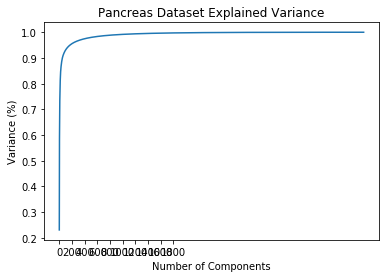

In [24]:
# graph to determine how many principal components should be selected for PCA of first data set

#Fitting the PCA algorithm with our Data
pca = PCA().fit(normalized_pancreas_t_merged_final)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800])
plt.ylabel('Variance (%)') #for each component
plt.title('Pancreas Dataset Explained Variance')
plt.show()

# Plot shows that we could do PCA with 100 principal components (could explain 95% of variance)


In [25]:
pca_2 = PCA(n_components=100)
#n_components < min(n_samples, n_features) = min(4800, 18578)

In [26]:
principalComponents = pca_2.fit_transform(normalized_pancreas_t_merged_final)

In [27]:
PCs_df = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2','pc 3','pc 4','pc 5','pc 6','pc 7','pc 8','pc 9','pc 10',
                         'pc 11', 'pc 12','pc 13','pc 14','pc 15','pc 16','pc 17','pc 18','pc 19','pc 20',
                         'pc 21', 'pc 22','pc 23','pc 24','pc 25','pc 26','pc 27','pc 28','pc 29','pc 30',
                         'pc 31', 'pc 32','pc 33','pc 34','pc 35','pc 36','pc 37','pc 38','pc 39','pc 40',
                         'pc 41', 'pc 42','pc 43','pc 44','pc 45','pc 46','pc 47','pc 48','pc 49','pc 50',
                         'pc 51', 'pc 52','pc 53','pc 54','pc 55','pc 56','pc 57','pc 58','pc 59','pc 60',
                         'pc 61', 'pc 62','pc 63','pc 64','pc 65','pc 66','pc 67','pc 68','pc 69','pc 70',
                         'pc 71', 'pc 72','pc 73','pc 74','pc 75','pc 76','pc 77','pc 78','pc 79','pc 80',
                         'pc 81', 'pc 82','pc 83','pc 84','pc 85','pc 86','pc 87','pc 88','pc 89','pc 90',
                         'pc 91', 'pc 92','pc 93','pc 94','pc 95','pc 96','pc 97','pc 98','pc 99','pc 100'],
                     index = normalized_pancreas_t_merged_final.index)

In [28]:
# viewing the gene expressions in the PC space now

PCs_df.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 91,pc 92,pc 93,pc 94,pc 95,pc 96,pc 97,pc 98,pc 99,pc 100
D2ex_1,-0.072723,0.668857,0.790823,0.274106,-0.464448,0.454265,0.370764,0.090676,0.099212,0.212742,...,0.005378,-0.022796,0.039780,0.015039,-0.007964,-0.017527,-0.027593,0.012750,0.002646,-0.073155
D2ex_2,0.081012,0.046200,1.289617,0.020126,0.057211,0.036148,-0.026195,0.040847,-0.065980,-0.014006,...,0.006549,0.025160,-0.007685,0.015937,-0.012605,-0.003067,-0.008810,0.002323,0.002919,0.013672
D2ex_3,0.032595,-0.090623,1.244084,-0.053024,0.022476,0.011463,-0.113080,0.053053,-0.115116,0.056880,...,-0.003390,0.001256,0.004121,0.000648,-0.001412,-0.003398,0.021083,-0.001048,0.014394,-0.001533
D2ex_4,0.492118,2.114689,-0.556512,0.732365,-0.669931,-0.151352,-0.228741,-0.438721,-0.395533,-0.009867,...,-0.002141,0.021658,-0.055460,-0.128803,-0.002237,-0.128368,0.011115,-0.044332,-0.001796,-0.033795
D2ex_5,0.004925,1.646718,-0.249257,0.729063,-0.626255,0.115957,-0.069345,-0.570131,-0.002746,-0.115466,...,-0.080369,0.031558,0.030514,0.009334,-0.154297,0.065624,0.087245,0.017700,-0.091345,0.009053


In [29]:
PCs_df1 = PCs_df[0:1728]
PCs_df1

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 91,pc 92,pc 93,pc 94,pc 95,pc 96,pc 97,pc 98,pc 99,pc 100
D2ex_1,-0.072723,0.668857,0.790823,0.274106,-0.464448,0.454265,0.370764,0.090676,0.099212,0.212742,...,0.005378,-0.022796,0.039780,0.015039,-0.007964,-0.017527,-0.027593,0.012750,0.002646,-0.073155
D2ex_2,0.081012,0.046200,1.289617,0.020126,0.057211,0.036148,-0.026195,0.040847,-0.065980,-0.014006,...,0.006549,0.025160,-0.007685,0.015937,-0.012605,-0.003067,-0.008810,0.002323,0.002919,0.013672
D2ex_3,0.032595,-0.090623,1.244084,-0.053024,0.022476,0.011463,-0.113080,0.053053,-0.115116,0.056880,...,-0.003390,0.001256,0.004121,0.000648,-0.001412,-0.003398,0.021083,-0.001048,0.014394,-0.001533
D2ex_4,0.492118,2.114689,-0.556512,0.732365,-0.669931,-0.151352,-0.228741,-0.438721,-0.395533,-0.009867,...,-0.002141,0.021658,-0.055460,-0.128803,-0.002237,-0.128368,0.011115,-0.044332,-0.001796,-0.033795
D2ex_5,0.004925,1.646718,-0.249257,0.729063,-0.626255,0.115957,-0.069345,-0.570131,-0.002746,-0.115466,...,-0.080369,0.031558,0.030514,0.009334,-0.154297,0.065624,0.087245,0.017700,-0.091345,0.009053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D17TGFB_92,0.011376,0.006622,1.047863,-0.008761,-0.128809,0.061099,-0.103187,0.017604,-0.113545,0.089529,...,-0.011023,0.000601,-0.000100,-0.000975,0.003105,0.000767,0.002193,-0.003844,0.005624,0.009183
D17TGFB_93,0.027438,0.126984,1.524179,0.122756,0.153593,0.056612,0.102863,0.102383,-0.028143,0.249558,...,-0.050204,-0.058402,0.029250,-0.037724,0.075181,0.008229,0.067681,0.047795,0.026018,-0.059714
D17TGFB_94,0.223527,-0.745478,0.000678,0.508937,-0.239077,0.067708,0.024719,0.089365,-0.152882,0.120036,...,-0.005561,0.001705,-0.005436,-0.002318,0.001457,-0.005200,0.000777,0.013121,-0.004593,-0.004069
D17TGFB_95,0.209529,-0.796907,0.063576,0.398455,-0.288415,0.045358,-0.028087,0.119343,-0.176883,0.078077,...,0.001431,0.002857,-0.001797,0.005644,0.008113,-0.005371,-0.001523,0.010029,-0.002361,-0.008816


In [30]:
PCs_df2 = PCs_df[1728:4800]
PCs_df2

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,...,pc 91,pc 92,pc 93,pc 94,pc 95,pc 96,pc 97,pc 98,pc 99,pc 100
D28-1_1,0.735398,-0.629847,-0.258759,0.490560,0.200020,0.026380,-0.048030,-0.230922,0.316357,-0.149915,...,0.004351,-0.002584,-0.000285,0.007509,-0.000593,-0.002964,0.003618,0.006352,-0.006391,0.010166
D28-1_2,0.546752,0.408884,-0.196091,-0.260663,0.060021,-0.051528,-0.369764,-0.002785,0.288433,-0.236814,...,-0.003455,0.014200,-0.005879,0.032709,0.026659,0.004722,-0.029579,0.014075,0.014377,-0.006850
D28-1_3,0.175672,-0.271063,0.121680,-0.705740,-0.344588,-0.491705,0.277108,-0.219563,0.014685,0.009728,...,-0.002160,0.000809,-0.005581,-0.003736,0.006364,-0.002013,-0.003060,0.000569,-0.003783,0.003041
D28-1_4,0.644731,0.229021,-0.312376,-0.353938,0.428005,0.052794,-0.152001,-0.101647,0.147630,-0.004108,...,0.011609,0.014265,-0.016049,-0.010201,-0.017769,-0.001365,-0.012330,0.019517,-0.035272,-0.002801
D28-1_5,0.373610,0.567101,-0.129452,0.074523,-0.022060,-0.261041,-0.118689,-0.355482,0.204785,-0.240418,...,0.303130,0.269080,-0.159249,0.567346,0.081184,0.216844,0.597380,-0.324584,-0.141178,-0.136585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D30-8_92,0.736886,-0.708048,-0.320276,0.511502,0.171984,-0.021782,0.094384,-0.019263,0.017428,0.058533,...,-0.001245,-0.016494,-0.007797,-0.016024,-0.022477,0.004502,0.009135,-0.017228,0.034994,-0.017195
D30-8_93,0.658996,1.204569,-0.512100,0.165726,-0.141540,-0.408749,-0.247508,-0.152481,-0.280102,-0.270941,...,0.014999,-0.044131,-0.028776,0.024970,-0.002785,-0.007224,0.050941,-0.023998,0.007665,-0.078948
D30-8_94,0.537835,0.600955,-0.195847,-0.087896,-0.593102,-0.086203,0.057235,0.983932,0.954750,-0.086575,...,0.005610,0.005522,0.056040,0.016456,-0.032226,-0.093848,-0.004452,0.043307,0.008100,-0.060912
D30-8_95,-1.188113,-0.312826,-0.197206,-0.074365,0.086544,-0.242696,0.187861,0.026424,0.054016,-0.124372,...,-0.001192,0.003416,0.004937,-0.008982,-0.019317,0.001114,0.009376,-0.009129,0.001476,-0.010964


Performing the Nearest Neighbors Algorithm 

We need to make a plot between error rate and n_neighbors and then choose a value for n_neighbors that minimizes
the error rate. Idea from https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

In [31]:
# Finding the nearest neighbors of cells from batch 2 to cells in batch 1 and saving the indices of the nearest neighbors in batch 1

NN1 = NearestNeighbors(n_neighbors = 20, algorithm = "kd_tree").fit(PCs_df1)
dist1, indices1 = NN1.kneighbors(PCs_df2)
indices1

array([[1447, 1683, 1381, ..., 1469, 1219, 1380],
       [1382,  853, 1477, ...,  368, 1448, 1258],
       [1478, 1068, 1493, ..., 1500,  842, 1212],
       ...,
       [1287,  582, 1281, ...,  620, 1484, 1382],
       [ 767, 1078, 1116, ..., 1096, 1213,  929],
       [ 767, 1116, 1078, ...,  721, 1193, 1228]])

In [32]:
# Finding the nearest neighbors of cells from batch 1 to cells in batch 2 and saving the indices of the nearest neighbors in batch 2

NN2 = NearestNeighbors(n_neighbors = 20, algorithm = "kd_tree").fit(PCs_df2)
dist2, indices2 = NN2.kneighbors(PCs_df1)
indices2

array([[2773,  965, 2154, ...,  144, 1796,   61],
       [2823, 2322, 2364, ..., 1579,  603,  281],
       [3011,  266, 2247, ..., 1914, 1790,  348],
       ...,
       [ 813, 3054, 2645, ..., 1559, 2219, 2735],
       [2700, 2098,  990, ...,  829, 2770, 1298],
       [1979, 1923, 2039, ..., 2410, 2586, 1767]])

In [33]:
# array of 0's and 1's, with 1's indicating a k-nearest neighbor of a cell in batch 2

graph1 = NN1.kneighbors_graph(PCs_df2).toarray()
graph1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
# array of 0's and 1's, with 1's indicating a k-nearest neighbor of a cell in batch 1

graph2 = NN2.kneighbors_graph(PCs_df1).toarray()
graph2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
# transposing to get the cells back in the columns

data1T = np.transpose(graph1)

#data2T = np.transpose(graph2)


In [36]:

W = np.multiply(data1T,graph2)
Windices = np.transpose((W>0).nonzero())
    

In [39]:
Windices

array([[   0,    0],
       [   0,   10],
       [   0,   12],
       ...,
       [1726, 1034],
       [1726, 1047],
       [1726, 1361]])

In [ ]:
# batch correction vectors for MNN pairs

correction_vectors = {}
for key in range(0,len(indices1)):
    #breakpoint()
    correction_vectors[key] = {}
    dist = list(dist1[key])
    indices = list(indices1[key])
    for i in range(0,len(dist)):
        correction_vectors[key][indices[i]] = dist[i]

Variance Threshold to find most variant genes

In [ ]:
# if want to deal with most variant genes

from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.04): #removes features with a variation below a cutoff
                                                       #we can play around with the threshold 
    selector = VarianceThreshold(threshold)
    selector.fit_transform(data)
    return data[data.columns[selector.get_support(indices=True)]]

topgenes_pancreas_1 = variance_threshold_selector(normalized_pancreas, 0.0005) #contains the features with a variation above the cutoff
topgenes_pancreas_1

In [26]:
# MAY NOT NEED TO DO THIS BECAUSE FUNCTION IN NEXT CELL APPEARS TO DO SCALING
# PCA is effected by scale so you need to scale the features in your data before applying PCA. 
# ^ is from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 

from sklearn.preprocessing import StandardScaler
normalized_pancreas_stand = StandardScaler().fit_transform(normalized_pancreas)

In [40]:
topgenes_pancreas_2 = variance_threshold_selector(normalized_pancreas_2, 0.0005) #contains the features with a variation above the cutoff
topgenes_pancreas_2

,D28-1_38,D28-3_41,D28-3_53,D28-4_4,D28-6_87,D29-1_61,D29-2_7,D29-6_74,D31-2_62,D31-4_16,...,D30-2_60,D30-2_71,D30-3_7,D30-4_82,D30-5_52,D30-6_28,D30-6_48,D30-7_88,D30-7_90,D30-8_69
A1BG-AS1__chr19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
A1BG__chr19,0.000000,0.003162,0.000000,0.000000,0.000000,0.002729,0.000000,0.0,0.000000,0.002667,...,0.000000,0.002524,0.002280,0.000000,0.0,0.001740,0.000000,0.000000,0.000000,0.000000
A1CF__chr10,0.009015,0.015780,0.000000,0.003802,0.025757,0.000000,0.000000,0.0,0.000000,0.000000,...,0.005089,0.015780,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.002524
A2M-AS1__chr12,0.000000,0.000627,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
A2ML1__chr12,0.000627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A__chr1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ZYG11B__chr1,0.005089,0.015090,0.032471,0.008354,0.019272,0.016535,0.010606,0.0,0.000000,0.016160,...,0.011687,0.025024,0.006867,0.003162,0.0,0.007001,0.008696,0.006562,0.022901,0.005089
ZYX__chr7,0.000627,0.003802,0.013806,0.004444,0.001890,0.044996,0.031943,0.0,0.003188,0.027150,...,0.004444,0.001890,0.013817,0.003162,0.0,0.036164,0.011618,0.013150,0.000000,0.001890
ZZEF1__chr17,0.001257,0.007040,0.000000,0.002524,0.014404,0.013752,0.000000,0.0,0.006389,0.024385,...,0.011015,0.018568,0.000000,0.001890,0.0,0.001740,0.002887,0.000000,0.007604,0.001257


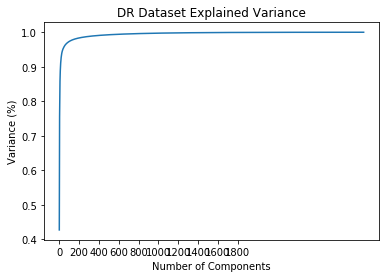

In [54]:
# graph to determine how many principal components should be selected for PCA of second data set

#Fitting the PCA algorithm with our Data
pca = PCA().fit(normalized_pancreas_2)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800])
plt.ylabel('Variance (%)') #for each component
plt.title('DR Dataset Explained Variance')
plt.show()

# Plot shows that we could do PCA with 100 principal components (could explain 98% of variance)
# It says the number of PCs should be = min(n_samples, n_features) in the class notes though..